# Example notebook

## Visualise unstructured data using dfm_tools
dfm_tools are Python post-processing tools for Delft3D FM model outputfiles and other netCDF files

This notebook contains an example taken from https://github.com/openearth/dfm_tools. More examples can be found at https://github.com/openearth/dfm_tools/tree/master/tests/examples

In [1]:
#import statements
import os
import matplotlib.pyplot as plt
plt.close('all')
from dfm_tools.get_nc import get_netdata, get_ncmodeldata, plot_netmapdata
from dfm_tools.get_nc_helpers import get_ncvardimlist, get_timesfromnc, get_hisstationlist

Matplotlib is building the font cache; this may take a moment.


In [2]:
# load map.nc data from all partitions
fname = 'data_unstruct/tttz_waq_0000_map.nc'
ugrid_all = get_netdata(file_nc=fname, multipart=True)

processing 8 partitions (first getting max number of facenodes)
processing netdata from domain 0000 of 0007
processing netdata from domain 0001 of 0007
processing netdata from domain 0002 of 0007
processing netdata from domain 0003 of 0007
processing netdata from domain 0004 of 0007
processing netdata from domain 0005 of 0007
processing netdata from domain 0006 of 0007
processing netdata from domain 0007 of 0007


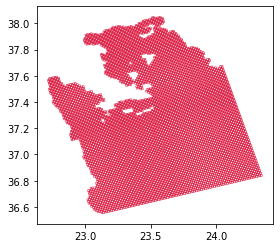

In [3]:
# plot the model grid
fig, ax = plt.subplots()
pc = plot_netmapdata(ugrid_all.verts, values=None, ax=None, linewidth=0.5, color="crimson", facecolor="None")
ax.set_aspect('equal')

reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
processing mapdata from domain 0000 of 0007
varname: mesh2d_s1  (5, 1625)  ('time', 'mesh2d_nFaces'), coordinates=(mesh2d_face_x mesh2d_face_y)
processing mapdata from domain 0001 of 0007
varname: mesh2d_s1  (5, 1294)  ('time', 'mesh2d_nFaces'), coordinates=(mesh2d_face_x mesh2d_face_y)
processing mapdata from domain 0002 of 0007
varname: mesh2d_s1  (5, 1358)  ('time', 'mesh2d_nFaces'), coordinates=(mesh2d_face_x mesh2d_face_y)
processing mapdata from domain 0003 of 0007
varname: mesh2d_s1  (5, 1594)  ('time', 'mesh2d_nFaces'), coordinates=(mesh2d_face_x mesh2d_face_y)
processing mapdata from domain 0004 of 0007
varname: mesh2d_s1  (5, 1617)  ('time', 'mesh2d_nFaces'), coordinates=(mesh2d_face_x mesh2d_face_y)
processing mapdata from domain 0005 of 0

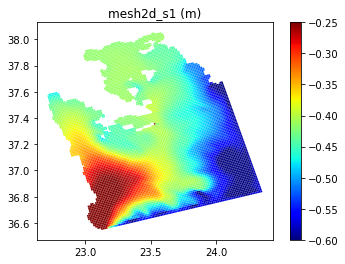

In [4]:
#plot water level on map
data_frommap_wl = get_ncmodeldata(file_nc=fname, varname='mesh2d_s1', timestep=-1, multipart=True)
fig, ax = plt.subplots()
pc = plot_netmapdata(ugrid_all.verts, values=data_frommap_wl[0,:], ax=None, linewidth=0.5, cmap="jet")
pc.set_clim([-0.6,-0.25])
fig.colorbar(pc, ax=ax)
ax.set_title('%s (%s)'%(data_frommap_wl.var_varname, data_frommap_wl.var_ncattrs['units']))
ax.set_aspect('equal')

reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
processing mapdata from domain 0000 of 0007
varname: mesh2d_tem1  (5, 1625, 47)  ('time', 'mesh2d_nFaces', 'mesh2d_nLayers'), coordinates=(mesh2d_face_x mesh2d_face_y mesh2d_layer_z)
processing mapdata from domain 0001 of 0007
varname: mesh2d_tem1  (5, 1294, 47)  ('time', 'mesh2d_nFaces', 'mesh2d_nLayers'), coordinates=(mesh2d_face_x mesh2d_face_y mesh2d_layer_z)
processing mapdata from domain 0002 of 0007
varname: mesh2d_tem1  (5, 1358, 47)  ('time', 'mesh2d_nFaces', 'mesh2d_nLayers'), coordinates=(mesh2d_face_x mesh2d_face_y mesh2d_layer_z)
processing mapdata from domain 0003 of 0007
varname: mesh2d_tem1  (5, 1594, 47)  ('time', 'mesh2d_nFaces', 'mesh2d_nLayers'), coordinates=(mesh2d_face_x mesh2d_face_y mesh2d_layer_z)
processing mapdata from doma

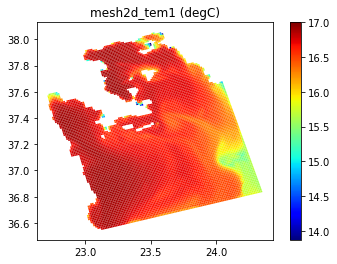

In [5]:
#plot temperature on map
data_frommap_sal = get_ncmodeldata(file_nc=fname, varname='mesh2d_tem1', timestep=-1, layer=-1, multipart=True)
fig, ax = plt.subplots()
pc = plot_netmapdata(ugrid_all.verts, values=data_frommap_sal[0,:,0], ax=None, linewidth=0.5, cmap="jet")
#pc.set_clim([36, 36.25])
fig.colorbar(pc, ax=ax)
ax.set_title('%s (%s)'%(data_frommap_sal.var_varname, data_frommap_sal.var_ncattrs['units']))
ax.set_aspect('equal')

# Visualise structured data

In [6]:
import xarray as xr

fname = 'data_struct/tttz_waq_0000_map_regular.nc'

In [7]:
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:                         (lon: 500, lat: 400, layer: 1, time: 5)
Coordinates:
  * lon                             (lon) float32 22.72 22.72 ... 24.34 24.35
  * lat                             (lat) float32 36.55 36.56 ... 38.04 38.05
  * layer                           (layer) float32 -1.0
  * time                            (time) datetime64[ns] 2022-04-02 ... 2022...
Data variables:
    mesh2d_ucx                      (time, lat, lon, layer) float64 ...
    mesh2d_ucy                      (time, lat, lon, layer) float64 ...
    mesh2d_sa1                      (time, lat, lon, layer) float64 ...
    mesh2d_tem1                     (time, lat, lon, layer) float64 ...
    mesh2d_OXY                      (time, lat, lon, layer) float64 ...
    mesh2d_water_quality_output_17  (time, lat, lon, layer) float64 ...
    mesh2d_s1                       (time, lat, lon) float32 ...
Attributes:
    description:  Example simulation data

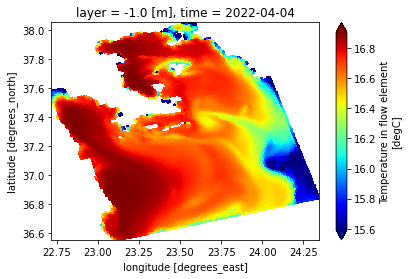

In [8]:
ds.mesh2d_tem1[-1,:,:,-1].plot(cmap="jet", robust=True)